t_vec [0 1 3 4] is a column vector of shape (4,)
b_vec [[ 0]
 [ 8]
 [ 8]
 [20]] is a column vector of shape (4, 1)


Text(0, 0.5, 'Value (v)')

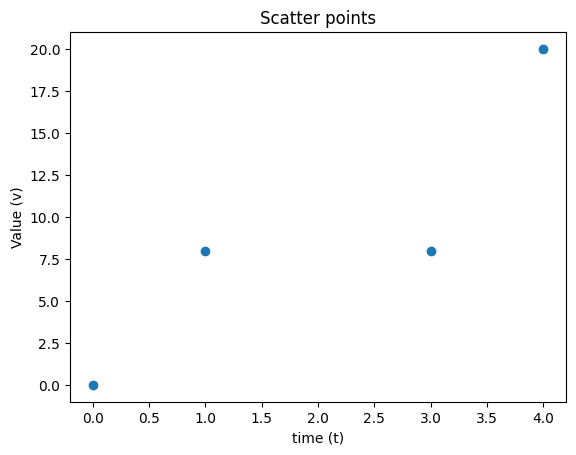

In [40]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy import newaxis
# create the points 
t_vec = np.array([0,1,3,4])
t_vec[:,newaxis]
b_vec = np.array([0,8,8,20]).reshape(4,1)
print(f"t_vec {t_vec} is a column vector of shape {t_vec.shape}")
print(f"b_vec {b_vec} is a column vector of shape {b_vec.shape}")

# plot the points 
#plt.subplot(1,2,1)
plt.scatter(t_vec,b_vec)
plt.title("Scatter points")
plt.xlabel("time (t)")
plt.ylabel("Value (v)")


1. with b = 0,8,8,20 at t = 0,1,3,4, set up and solve the normal equation for the best straight line for the data above and finds the new bs . What is the least square error 

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import newaxis

# create the points
t_vec = np.array([0,1,3,4])
b_vec = np.array([0,8,8,20])


# alright the least square error can be found with the normal equation.
# first we need to form A ( the columns space)
A = np.ones((4,2))
A[:,1] = t_vec
x_vec_bar = np.linalg.solve(A.T@A,A.T@b_vec)

#now since we have found C,D which are the coefficient of the fitted lines, we need to get the new
#output
print(f"The solution vector x_vec_bar {x_vec_bar} with shape {x_vec_bar.shape}")
C = x_vec_bar[0]
D = x_vec_bar[1]
y = C + D*t_vec

# Corrected calculation of p
p = A @ x_vec_bar
print(f"The projected vector p:\n{p}")

# number 2 
#we already found that p = [1,5,13,17] as a solution from number 1 and using them as measurements 
# we now are able to find the exact solution of the system of equations using reduced row echelon form
# we can use sympy to do this
# we will use the augmented matrix [A|p] and find the reduced row echelon

p = np.array([1,5,13,17])
import sympy as sp
augmented_A= sp.Matrix.hstack(sp.Matrix(A),sp.Matrix(p))
rref_A = augmented_A.rref() 
# for C 
C = rref_A[0][0,2]
D = rref_A[0][1,2]
# Solutions from Strang 5tth edition page 228
assert (int(C) == 1) # for C
assert (int(D) == 4) # for D

# 3 numbers 
e = b_vec - p
E =  np.sum(e**2)
print(f"The error vector e:\n{e}")
print(f"The sum of squared errors E: {E}")

1
# verifiying that e is perpendicular to tA
zero_matrix = e.T @ A
print(zero_matrix)
# shortest distance
print(f"The shortest distance {np.sqrt(E)}")

# 4 check the attached markdown file

#


The solution vector x_vec_bar [1. 4.] with shape (2,)
The projected vector p:
[ 1.  5. 13. 17.]
The error vector e:
[-1  3 -5  3]
The sum of squared errors E: 44
[0. 0.]
The shortest distance 6.6332495807108


4. Prof attached in the markdown


In [42]:
# 5. Assume you only to fit a horizontal line to the data points.
# find C
# y = C
A = np.ones((4,1))
x_vec_bar = np.linalg.solve(A.T@A,A.T@b_vec)
C = x_vec_bar[0]
print(f"The horizontal line fit C: {C}")
e = C - b_vec
print(e)



The horizontal line fit C: 9.0
[  9.   1.   1. -11.]


#

In [43]:
#6 same as five but we find D

112
26
4.3076923076923075


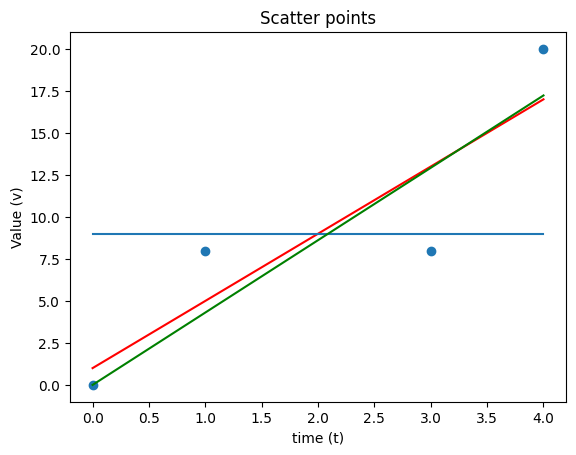

In [44]:
# 7 same Find the closest line y = D.t passing through the origin
A = t_vec
print(A.T@b_vec)
print(A.T@A)
D = (A.T@b_vec)/(A.T@A)
print(D)

plt.scatter(t_vec,b_vec)
plt.title("Scatter points")
plt.xlabel("time (t)")
plt.ylabel("Value (v)")
plt.plot(t_vec,y, 'r')
N = 100
t_vec_interpolated = np.linspace(t_vec[0],t_vec[-1],N)
plt.plot(t_vec_interpolated,np.ones(N)*C)
y = D*t_vec_interpolated
plt.plot(t_vec_interpolated,y,'g')
plt.show()



[[ 1.  0.  0.]
 [ 1.  1.  1.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]]


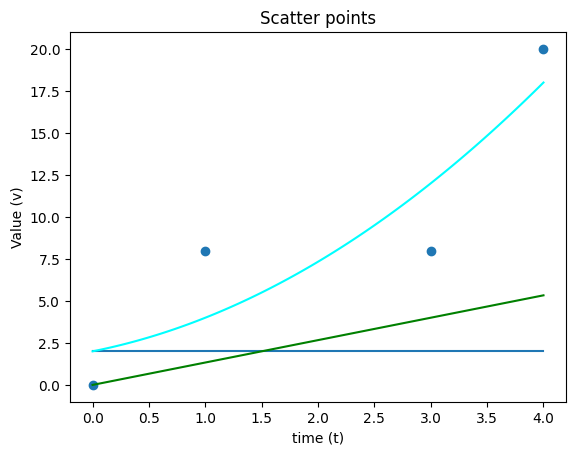

In [46]:
# fit the points to a parabola
A_parabola = np.ones((4,3))
A_parabola[:,1] = t_vec
A_parabola[:,2] = t_vec**2
print(A_parabola)

A_transposeA = A_parabola.T@A_parabola

[C,D,E] = np.linalg.solve(A_transposeA,A_parabola.T@b_vec)


plt.scatter(t_vec,b_vec)
plt.title("Scatter points")
plt.xlabel("time (t)")
plt.ylabel("Value (v)")
#plt.plot(t_vec,y, 'r')
N = 100
t_vec_interpolated = np.linspace(t_vec[0],t_vec[-1],N)
plt.plot(t_vec_interpolated,np.ones(N)*C)
y = D*t_vec_interpolated
y_parabola = C + t_vec_interpolated*D + t_vec_interpolated**2*E
plt.plot(t_vec_interpolated,y,'g')
plt.plot(t_vec_interpolated,y_parabola,'cyan')
plt.show()